### Kaggle competition House Prices

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
train = pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

C:\Users\ADMIN\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(<matplotlib.axes._subplots.AxesSubplot at 0x1e3f2726e80>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1e3f27db8d0>)

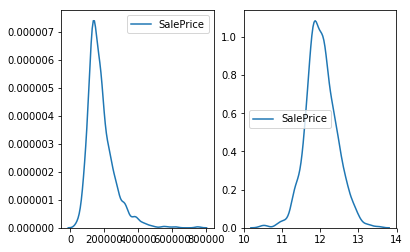

In [3]:
fig, ax =plt.subplots(1,2)
sb.kdeplot(np.log1p(train['SalePrice']),ax=ax[1]),sb.kdeplot(train['SalePrice'],ax=ax[0])

### SalePrice skewed so we will use log1p to make it look like more normal

In [4]:
train['SalePrice']=np.log1p(train['SalePrice'])

In [5]:
all_data = pd.concat((train, test)).reset_index(drop=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2919, 81)


C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220


In [7]:
all_data.isnull().sum().sort_values()[::-1]

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
SalePrice        1459
FireplaceQu      1420
LotFrontage       486
GarageFinish      159
GarageCond        159
GarageQual        159
GarageYrBlt       159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
BsmtFullBath        2
BsmtHalfBath        2
Utilities           2
Functional          2
Electrical          1
Exterior2nd         1
KitchenQual         1
Exterior1st         1
GarageCars          1
TotalBsmtSF         1
                 ... 
Neighborhood        0
YearBuilt           0
WoodDeckSF          0
TotRmsAbvGrd        0
Street              0
ScreenPorch         0
SaleCondition       0
RoofStyle           0
RoofMatl            0
PoolArea            0
PavedDrive          0
OverallQual         0
OverallCond         0
OpenPorchSF         0
MoSold    

### Fill na_Values (feature filled with None - one more value of feature).Features like poolqc where a lot of missing we can drop but its possible that house just dont have pool

In [8]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
all_data["LotFrontage"] = all_data['LotFrontage'].fillna(all_data['LotFrontage'].median())
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data = all_data.drop(['Utilities'], axis=1)
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

### SalePrice for test should be null

In [9]:
all_data.isnull().sum().sort_values()[::-1][:5]

SalePrice     1459
YrSold           0
Foundation       0
ExterCond        0
ExterQual        0
dtype: int64

### Add feature TotalSF(total size of house)

In [10]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

### Cols_real - real valued columns
### Cols_skew - cols with skew > 2 

In [11]:
cols_real = all_data.columns[all_data.dtypes!=object]
cols_skew = cols_real[all_data[cols_real].apply(lambda x:x.skew())>2]


### Without skew

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E3F2B31EB8>,
      dtype=object)

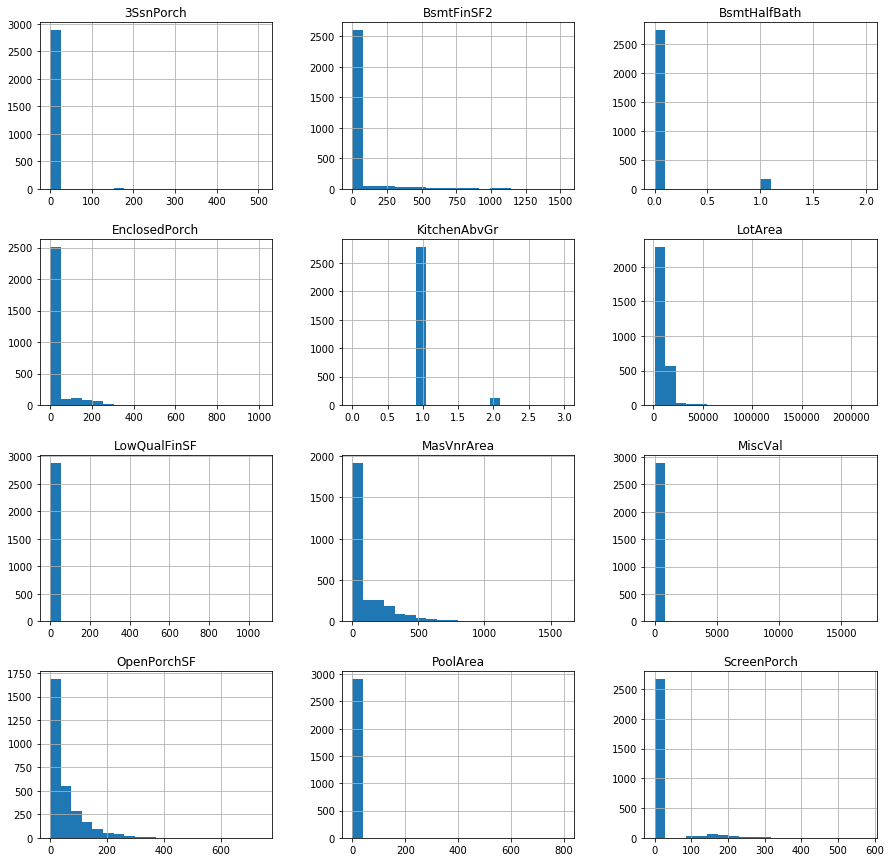

In [12]:
all_data[cols_skew].hist(figsize=(15,15),bins=20)

### use boxcox transformation becase it show better value of correaltion 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E3F2DAC7B8>,
      dtype=object)

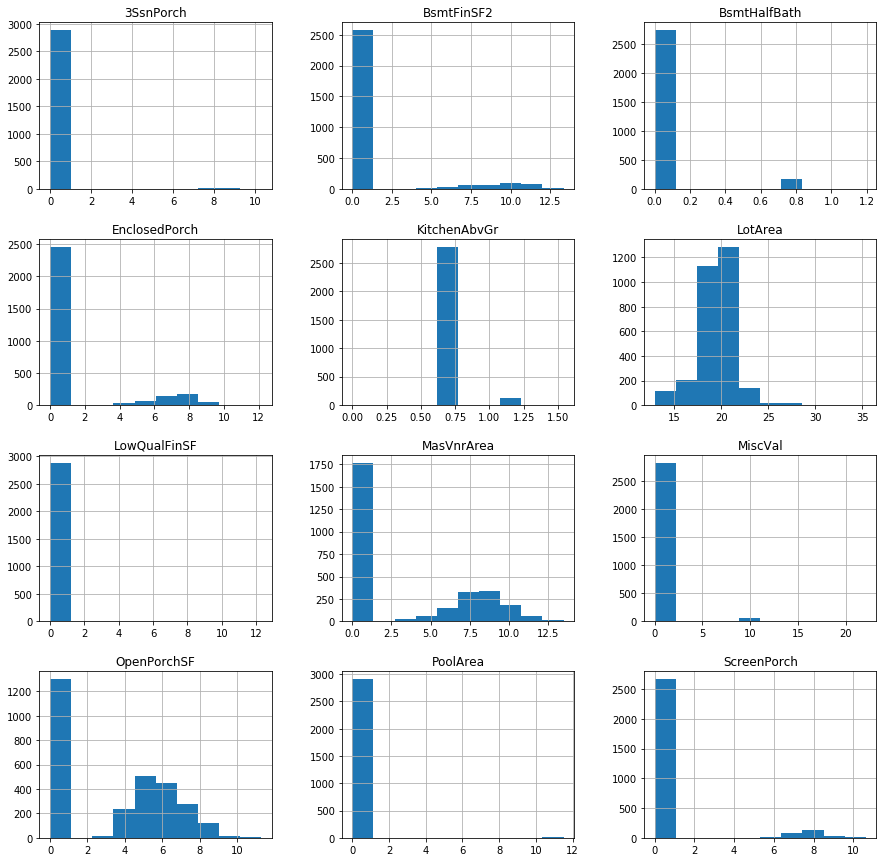

In [13]:
from scipy.special import boxcox1p
boxcox_val = 0.15
all_data[cols_skew].apply(lambda x:boxcox1p(x,boxcox_val)).hist(figsize=(15,15))

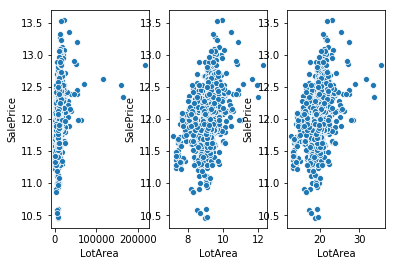

In [14]:
fig, ax =plt.subplots(1,3)
sb.scatterplot(x=all_data['LotArea'],y=all_data['SalePrice'],ax=ax[0])
sb.scatterplot(x=np.log1p(all_data['LotArea']),y=all_data['SalePrice'],ax=ax[1])
sb.scatterplot(x=boxcox1p(all_data['LotArea'],boxcox_val),y=all_data['SalePrice'],ax=ax[2])

In [15]:
('without transorm: ',np.corrcoef(train['LotArea'].values,train['SalePrice'].values)[0,1]),('with_trans',np.corrcoef(boxcox1p(train['LotArea'].values,boxcox_val),train['SalePrice'].values)[0,1])

(('without transorm: ', 0.2573200650671404),
 ('with_trans', 0.3991492255803566))

In [16]:
all_data[cols_skew]= all_data[cols_skew].apply(lambda x:boxcox1p(x,boxcox_val))

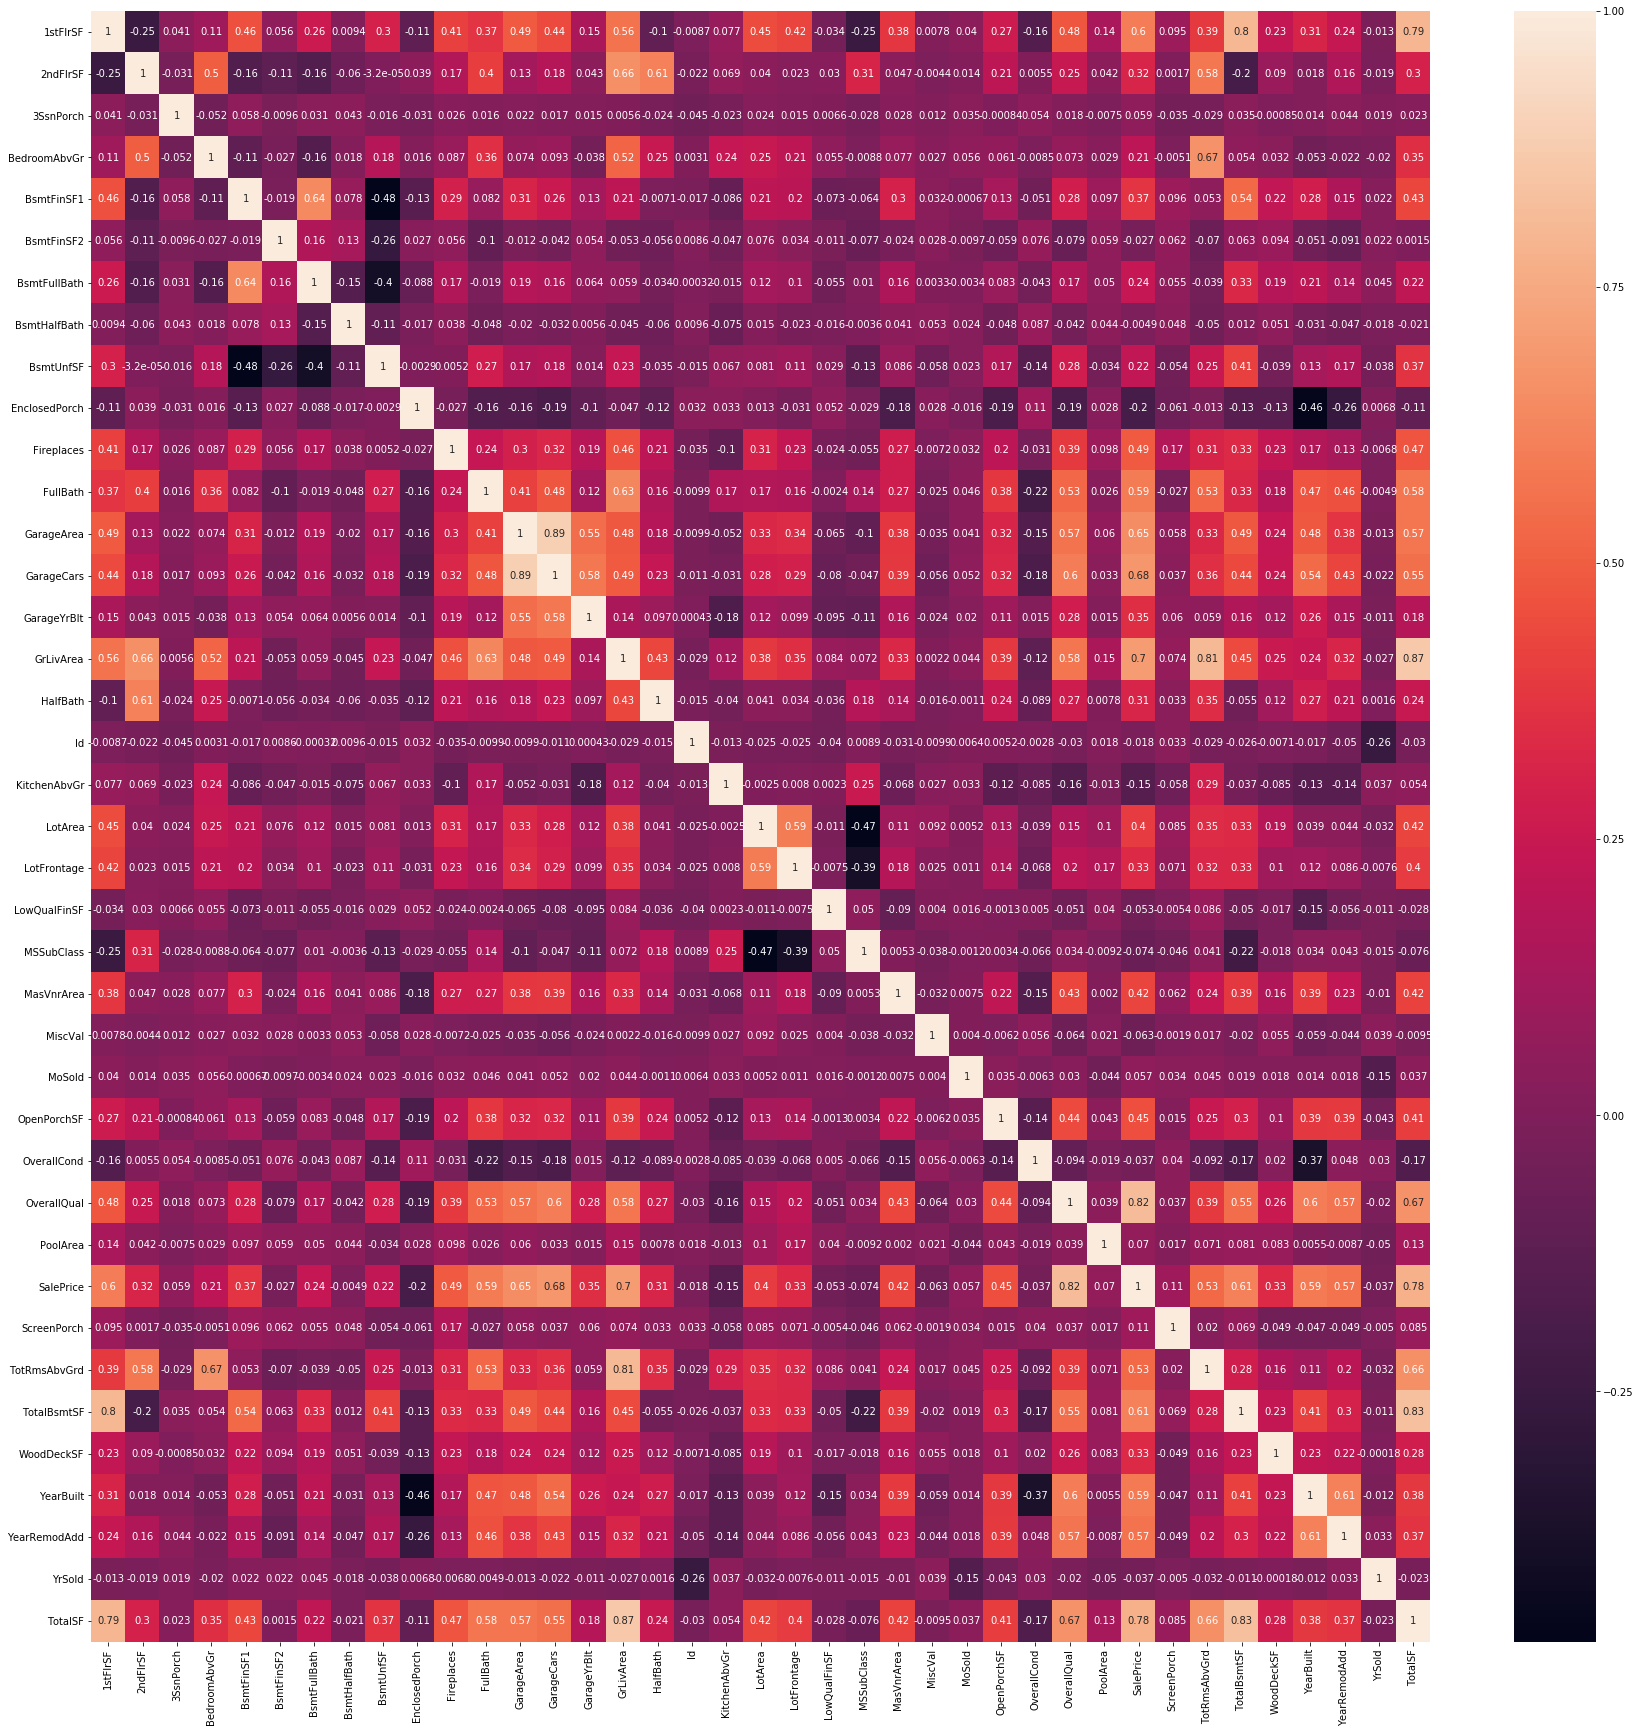

In [17]:
fig, ax = plt.subplots(figsize=(30,30))
sb.heatmap(all_data[cols_real].corr(),ax=ax,annot=True)

### encode obj features using onehotencoding

In [18]:
obj = all_data.columns[all_data.dtypes==object]
all_data_dummies = pd.get_dummies(all_data[obj])

In [19]:
data = all_data[cols_real].join(all_data_dummies)

In [20]:
train = data[:train.shape[0]]
test = data[train.shape[0]:]

In [21]:
test.shape,train.shape

((1459, 303), (1460, 303))

In [22]:
y_train = train['SalePrice']
X_train = train.drop(['SalePrice','Id'],axis=1)
X_test = test.drop(['SalePrice','Id'],axis=1)

### detect outliee

In [24]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,make_scorer


C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [25]:
rr = Ridge(alpha=1)
rr.fit(X_train,y_train)
-cross_val_score(rr, X_train,y_train,cv=5,scoring='neg_mean_squared_error').mean()

0.020811124679531324

In [26]:
preds = rr.predict(X_train)-y_train

In [27]:
norm = (preds-np.mean(preds))/np.std(preds)
ar = np.where(np.abs(norm)>3*np.std(np.abs(norm)))[0]

In [28]:
ar

array([  13,   30,   66,   88,  107,  142,  308,  318,  328,  380,  410,
        431,  462,  495,  523,  533,  560,  581,  588,  607,  628,  632,
        658,  681,  688,  710,  711,  714,  726,  728,  774,  803,  825,
        874,  898,  916,  935,  968,  970, 1062, 1139, 1168, 1170, 1181,
       1298, 1324, 1383, 1423, 1432, 1453], dtype=int64)

In [29]:
X_train.drop(X_train.index[list(ar)],inplace=True)

In [30]:
y_train.drop(y_train.index[list(ar)],inplace=True)

C:\Users\ADMIN\Anaconda3\lib\site-packages\pandas\core\generic.py:3114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(obj)


In [31]:
X_train.shape,y_train.shape,X_test.shape

((1410, 301), (1410,), (1459, 301))

In [32]:
def cross_vall_model(model,params):
    clf = GridSearchCV(model, params, cv=5,scoring=make_scorer(mean_squared_error))
    clf.fit(X_train,y_train)
    print(clf.best_estimator_)
    best_score = clf.best_score_
    indx = np.where(clf.cv_results_['mean_test_score']==clf.best_score_)[0][0]
    std = clf.cv_results_['std_test_score'][indx]
    print('Conf_interv: ',best_score-2*std,best_score+2*std)
    print('-------------------------')
    return clf,best_score

In [33]:
mod_pars = [(Ridge(),{'alpha':np.linspace(0.01,10)}),(Lasso(), {'alpha':np.linspace(1,10)})]

In [34]:
for model,pars in mod_pars:
    cross_vall_model(model,pars)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
Conf_interv:  0.00749272003691718 0.010010740421418389
-------------------------
Lasso(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
Conf_interv:  0.03140015770842934 0.04164047031696222
-------------------------


### Ridge perfoms really well